In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
print("Loading dataset...")

try:
    from google.colab import files
    colab_env = True
except ImportError:
    colab_env = False

file_to_upload = 'train.csv'

if colab_env:
    print(f"Running in Google Colab. Please upload the '{file_to_upload}' file.")
    uploaded = files.upload()

    if file_to_upload not in uploaded:
        print(f"Error: '{file_to_upload}' must be uploaded to proceed.")
        exit()
    print(f"'{file_to_upload}' uploaded successfully to Colab environment.")

try:

    df = pd.read_csv(file_to_upload)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: Make sure '{file_to_upload}' is in the same directory.")
    print("If running in Colab, ensure you have uploaded the file.")
    exit()

Loading dataset...
Running in Google Colab. Please upload the 'train.csv' file.


Saving train.csv to train.csv
'train.csv' uploaded successfully to Colab environment.
Dataset loaded successfully.


In [3]:
print("\n--- Initial Data Info ---")
print(df.info())
print("\n--- First 5 Rows of Data ---")
print(df.head())
print("\n--- Descriptive Statistics ---")
print(df.describe(include='all'))
print("\n--- Missing Values Before Cleaning ---")
print(df.isnull().sum())


--- Initial Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

--- First 5 Rows of Data ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4 

In [4]:
print("\n--- Performing Data Cleaning ---")

print("Filling missing 'Age' values with the median...")
df['Age'].fillna(df['Age'].median(), inplace=True)

print("Filling missing 'Embarked' values with the mode...")
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

print("Creating 'Has_Cabin' feature and dropping 'Cabin' column...")
df['Has_Cabin'] = df['Cabin'].apply(lambda x: 0 if type(x) == float else 1)
df.drop('Cabin', axis=1, inplace=True)

print("Dropping 'PassengerId', 'Name', and 'Ticket' columns...")
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

print("\n--- Missing Values After Cleaning ---")
print(df.isnull().sum())
print("\n--- Data Info After Cleaning ---")
print(df.info())
print("\n--- First 5 Rows After Cleaning ---")
print(df.head())


--- Performing Data Cleaning ---
Filling missing 'Age' values with the median...
Filling missing 'Embarked' values with the mode...
Creating 'Has_Cabin' feature and dropping 'Cabin' column...
Dropping 'PassengerId', 'Name', and 'Ticket' columns...

--- Missing Values After Cleaning ---
Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
Has_Cabin    0
dtype: int64

--- Data Info After Cleaning ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    object 
 3   Age        891 non-null    float64
 4   SibSp      891 non-null    int64  
 5   Parch      891 non-null    int64  
 6   Fare       891 non-null    float64
 7   Embarked   891 non-null    object 
 8   Has_Cabin  891 non-nu

/tmp/ipython-input-4-90355198.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-4-90355198.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 


--- Performing Exploratory Data Analysis (EDA) ---


/tmp/ipython-input-5-4126685743.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, palette='viridis')


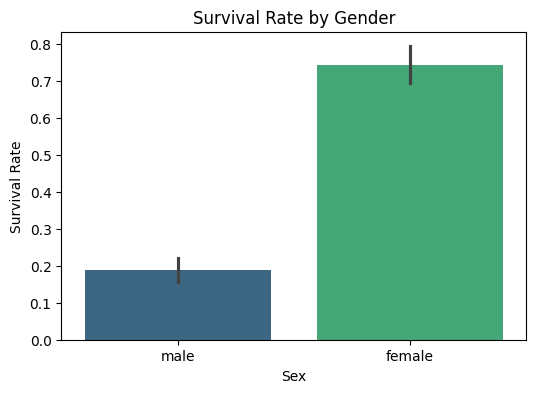

In [5]:
print("\n--- Performing Exploratory Data Analysis (EDA) ---")

# Visualize Survival Rate by Gender
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df, palette='viridis')
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

/tmp/ipython-input-6-2303791271.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, palette='magma')


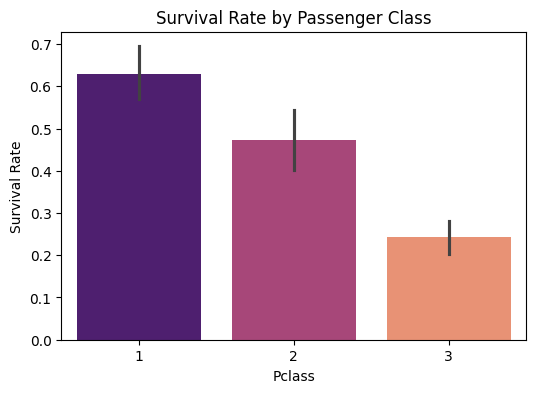

In [6]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df, palette='magma')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

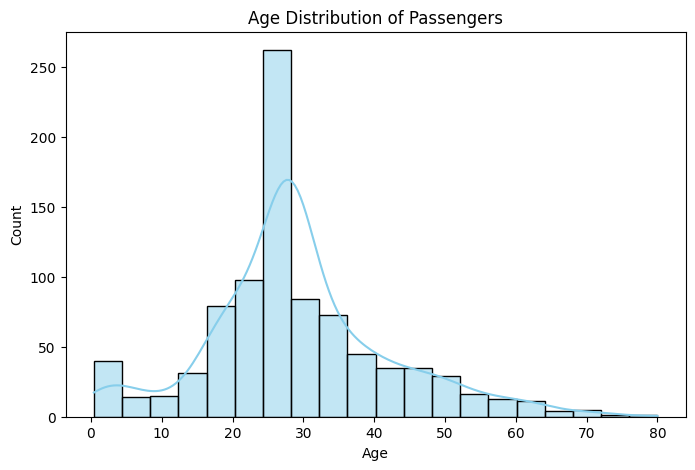

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

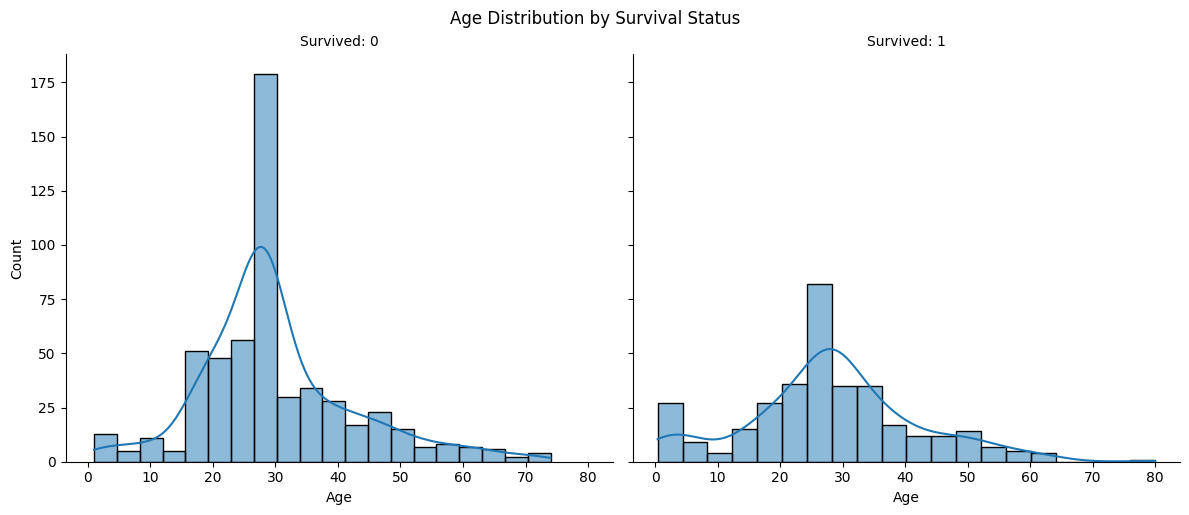

In [9]:
g = sns.FacetGrid(df, col='Survived', height=5, aspect=1.2)
g.map(sns.histplot, 'Age', bins=20, kde=True)
g.set_axis_labels('Age', 'Count')
g.set_titles('Survived: {col_name}')
plt.suptitle('Age Distribution by Survival Status', y=1.02)
plt.show()

/tmp/ipython-input-10-3529051530.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=df, palette='plasma')


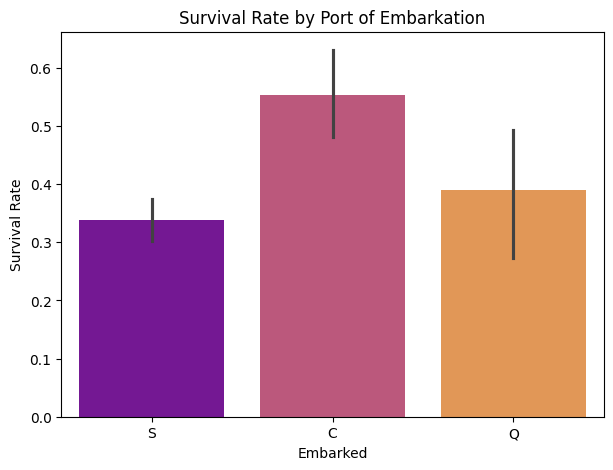

In [10]:
plt.figure(figsize=(7, 5))
sns.barplot(x='Embarked', y='Survived', data=df, palette='plasma')
plt.title('Survival Rate by Port of Embarkation')
plt.ylabel('Survival Rate')
plt.show()

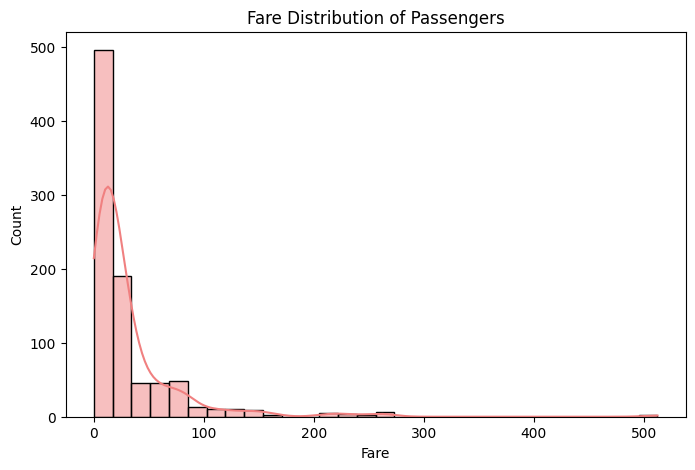

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Fare'], bins=30, kde=True, color='lightcoral')
plt.title('Fare Distribution of Passengers')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

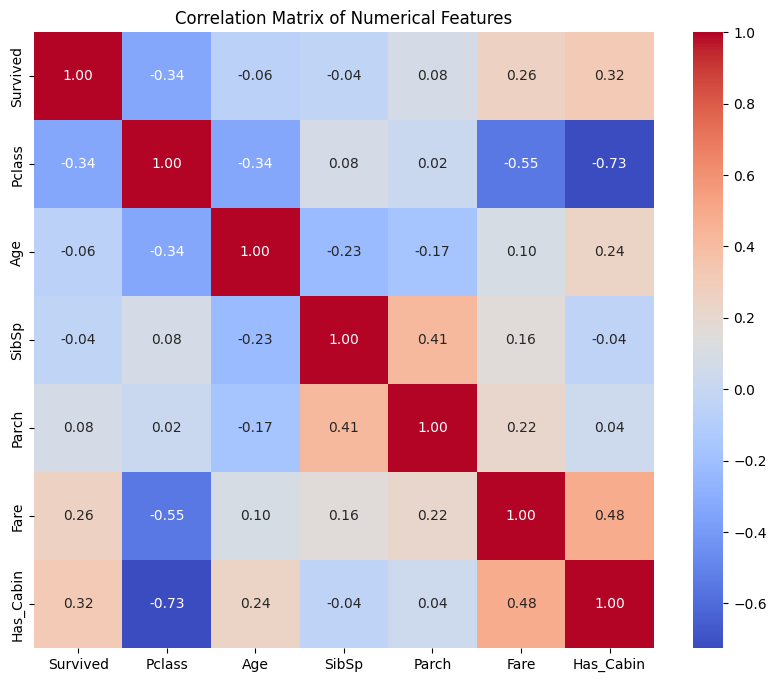

In [12]:
plt.figure(figsize=(10, 8))
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

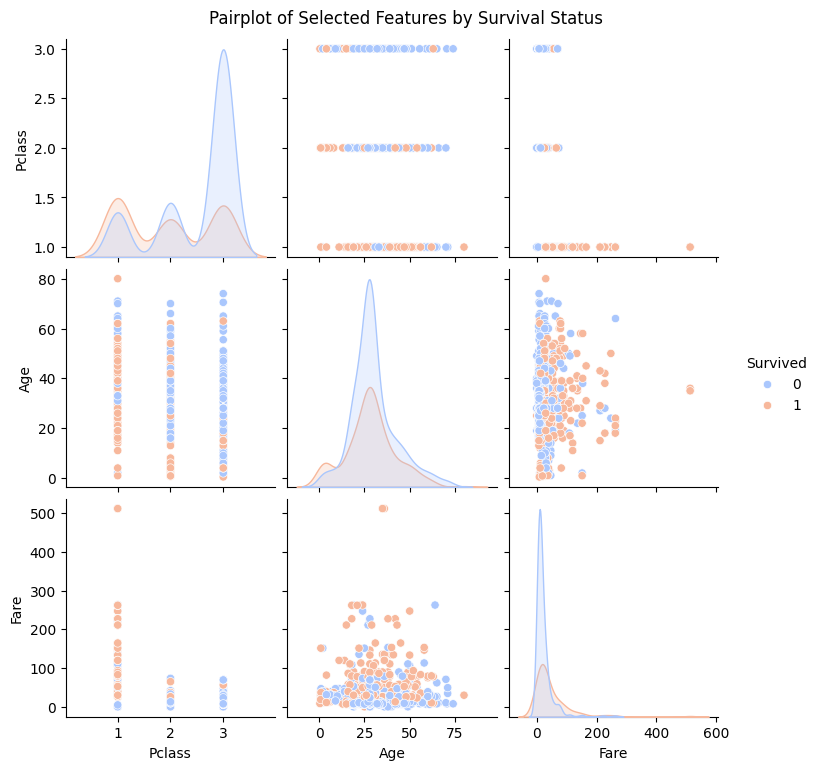


EDA complete. Insights can be drawn from the generated plots.


In [14]:
selected_features_for_pairplot = ['Survived', 'Pclass', 'Age', 'Fare', 'Sex', 'Embarked']
temp_df_for_pairplot = df[selected_features_for_pairplot].copy()
temp_df_for_pairplot['Sex'] = temp_df_for_pairplot['Sex'].astype('category')
temp_df_for_pairplot['Embarked'] = temp_df_for_pairplot['Embarked'].astype('category')


sns.pairplot(temp_df_for_pairplot, hue='Survived', palette='coolwarm', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features by Survival Status', y=1.02)
plt.show()

print("\nEDA complete. Insights can be drawn from the generated plots.")
